<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/L1_and_L2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Flatten
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [7]:
# Define function to create models
def create_model(regularizer=None, activation='relu'):
    model = keras.Sequential([
        layers.Dense(512, activation=activation, kernel_regularizer=regularizer, input_shape=(28*28,)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Train baseline model
baseline_model = create_model()
baseline_history = baseline_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8996 - loss: 0.3417 - val_accuracy: 0.9707 - val_loss: 0.0940
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9754 - loss: 0.0811 - val_accuracy: 0.9734 - val_loss: 0.0786
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9838 - loss: 0.0514 - val_accuracy: 0.9793 - val_loss: 0.0694
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9882 - loss: 0.0351 - val_accuracy: 0.9785 - val_loss: 0.0701
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9926 - loss: 0.0242 - val_accuracy: 0.9792 - val_loss: 0.0698
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9788 - val_loss: 0.0689
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.9800 - val_loss: 0.0720
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9957 - loss: 0

In [9]:
# Train L1-regularized model
l1_model = create_model(regularizers.l1(0.001))
l1_history = l1_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8470 - loss: 2.4517 - val_accuracy: 0.9142 - val_loss: 0.6965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9149 - loss: 0.6707 - val_accuracy: 0.9379 - val_loss: 0.5404
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9338 - loss: 0.5498 - val_accuracy: 0.9423 - val_loss: 0.4887
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9424 - loss: 0.4901 - val_accuracy: 0.9507 - val_loss: 0.4584
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9448 - loss: 0.4614 - val_accuracy: 0.9453 - val_loss: 0.4418
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9461 - loss: 0.4468 - val_accuracy: 0.9476 - val_loss: 0.4439
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9493 - loss: 0.4262 - val_accuracy: 0.9505 - val_loss: 0.4151
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9492 -

In [11]:
# Train L2-regularized model
l2_model = create_model(regularizers.l2(0.001))
l2_history = l2_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8967 - loss: 0.5952 - val_accuracy: 0.9621 - val_loss: 0.2448
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9576 - loss: 0.2528 - val_accuracy: 0.9594 - val_loss: 0.2301
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9630 - loss: 0.2253 - val_accuracy: 0.9660 - val_loss: 0.2098
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9683 - loss: 0.2051 - val_accuracy: 0.9700 - val_loss: 0.1918
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9708 - loss: 0.1916 - val_accuracy: 0.9702 - val_loss: 0.1842
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9728 - loss: 0.1796 - val_accuracy: 0.9714 - val_loss: 0.1798
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9724 - loss: 0.1728 - val_accuracy: 0.9653 - val_loss: 0.1924
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9743 - 

In [12]:
# Train model with different activation function (sigmoid instead of relu)
sigmoid_model = create_model(activation='sigmoid')
sigmoid_history = sigmoid_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8521 - loss: 0.5376 - val_accuracy: 0.9398 - val_loss: 0.2023
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9442 - loss: 0.1883 - val_accuracy: 0.9610 - val_loss: 0.1291
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9629 - loss: 0.1213 - val_accuracy: 0.9683 - val_loss: 0.1024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9763 - loss: 0.0806 - val_accuracy: 0.9748 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9821 - loss: 0.0589 - val_accuracy: 0.9771 - val_loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9877 - loss: 0.0424 - val_accuracy: 0.9789 - val_loss: 0.0691
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9909 - loss: 0.0320 - val_accuracy: 0.9803 - val_loss: 0.0642
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9941 - loss: 

In [13]:
# Train model with Leaky ReLU activation
leaky_relu_model = create_model(activation=keras.layers.LeakyReLU(alpha=0.01))
leaky_relu_history = leaky_relu_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9024 - loss: 0.3371 - val_accuracy: 0.9702 - val_loss: 0.0993
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9744 - loss: 0.0828 - val_accuracy: 0.9702 - val_loss: 0.0907
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9843 - loss: 0.0516 - val_accuracy: 0.9776 - val_loss: 0.0728
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9770 - val_loss: 0.0709
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9783 - val_loss: 0.0706
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9813 - val_loss: 0.0651
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9805 - val_loss: 0.0678
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9954 - loss: 0

In [15]:
# Plot training loss and accuracy
def plot_history(histories, title):
    plt.figure(figsize=(12, 5))
    for label, history in histories.items():
        plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
    plt.title(f'{title} - Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{label} Val Accuracy')
    plt.title(f'{title} - Validation Accuracy')
    plt.legend()
    plt.show()

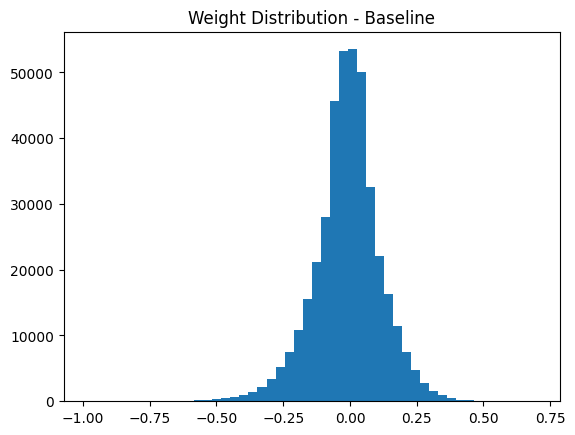

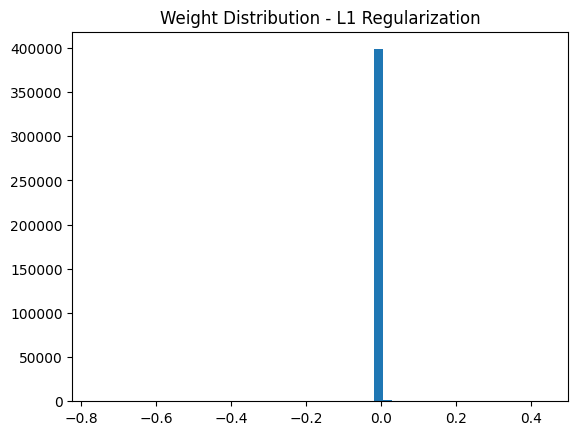

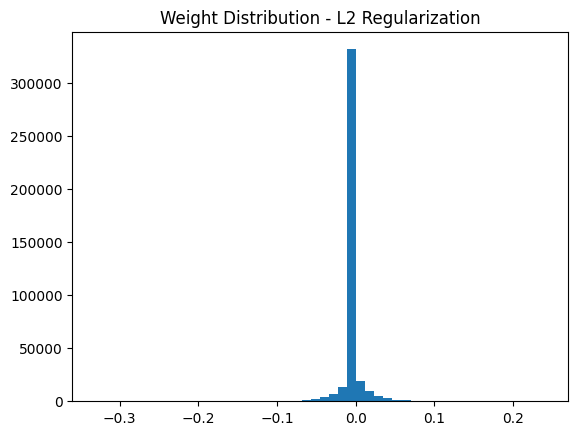

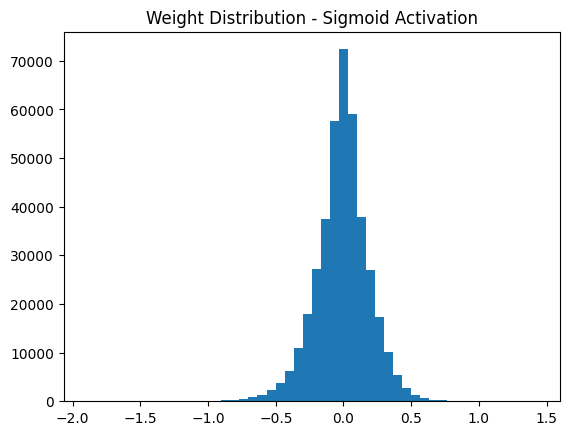

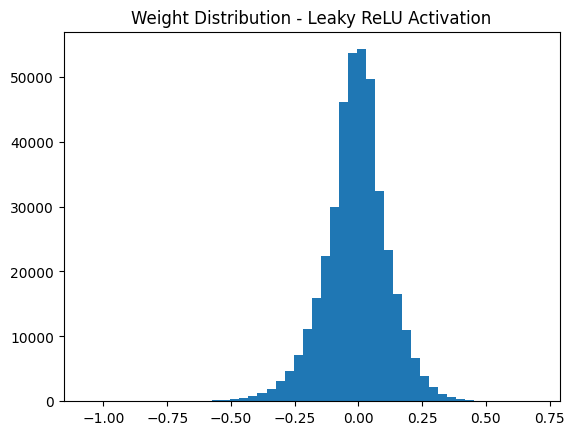

In [16]:
# Weight distribution visualization
def plot_weights(model, title):
    weights = model.layers[0].get_weights()[0].flatten()
    plt.hist(weights, bins=50)
    plt.title(f'Weight Distribution - {title}')
    plt.show()

plot_weights(baseline_model, "Baseline")
plot_weights(l1_model, "L1 Regularization")
plot_weights(l2_model, "L2 Regularization")
plot_weights(sigmoid_model, "Sigmoid Activation")
plot_weights(leaky_relu_model, "Leaky ReLU Activation")

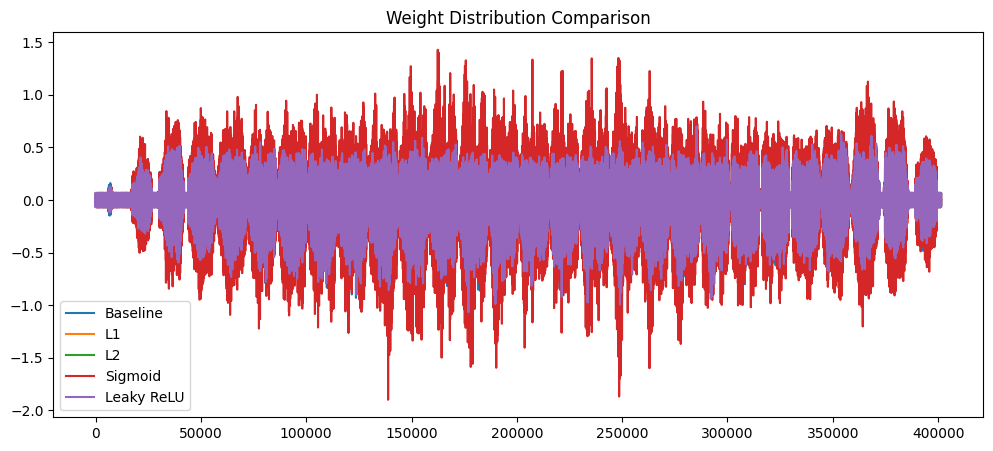

In [17]:
# Compare weight changes
def plot_weight_changes(models, labels):
    plt.figure(figsize=(12, 5))
    for model, label in zip(models, labels):
        weights = model.layers[0].get_weights()[0].flatten()
        plt.plot(weights, label=label)
    plt.title("Weight Distribution Comparison")
    plt.legend()
    plt.show()

plot_weight_changes([baseline_model, l1_model, l2_model, sigmoid_model, leaky_relu_model],
                    ["Baseline", "L1", "L2", "Sigmoid", "Leaky ReLU"])
